In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

with open("output/crawl.json", "r") as file:
    data = json.load(file)

for i, tweet in enumerate(data):
    crawl_response = tweet["data"]
    for inner in crawl_response:
        G.add_node(inner["id"])
for i, tweet in enumerate(data):
    crawl_response = tweet["data"]
    for inner in crawl_response:
        if "referenced_tweets" in inner:
            referenced_list = inner["referenced_tweets"]
            for referenced in referenced_list:
                if referenced["type"] == "replied_to":
                    if (referenced["id"]) not in G:
                        G.add_node(referenced["id"])
                    G.add_edge(referenced["id"], inner["id"])

In [5]:
branch = nx.dfs_tree(G, '1158462872688586752')

In [6]:
len(list(nx.algorithms.dag.descendants(branch, '1158462872688586752')))

0

In [7]:
nx.is_tree(branch)

True

In [8]:
# Children of root
children = list(G["1158074774297468928"])
print(len(children))
children[:10]

59270


['1441249655480848384',
 '1430224818616504320',
 '1426376591773511681',
 '1423390836096651268',
 '1422524403770925067',
 '1421939730829115392',
 '1416000470972305409',
 '1401891168695242754',
 '1387543196285218818',
 '1385657316645785602']

In [13]:
# Children with more than 100 children itself
for child in children:
    if 200 < len(G[child]):
        print(child)

1158188839258730497
1158134235288473601
1158101272756490240
1158094341019058176
1158086596123648002
1158079178127892483
1158075268965326849


In [11]:
subgraph_nodes = nx.descendants(G, "1158079178127892483")
print(subgraph_nodes)
l = list(subgraph_nodes)
l.append("1158079178127892483")
subgraph = G.subgraph(l)
print(subgraph)

{'1158134453329432576', '1158118851420332032', '1158360941639163906', '1158438389458329602', '1158126101966852097', '1158379929735745536', '1158142722705952770', '1158228491130687489', '1158143191993987072', '1158129439810686977', '1158269474082103297', '1158385921277874176', '1158113214699376641', '1158149920899174401', '1158294208861495296', '1158125890213240832', '1158129631058386950', '1158195537608183810', '1158108458392014848', '1158347126407094272', '1158112716197912582', '1158111500252438532', '1158112115342942209', '1158192165823995904', '1158118406513672198', '1158133423614988288', '1158625142324391941', '1158112908037038081', '1158191320286076932', '1158134758393765888', '1158207496323919872', '1158127973397958656', '1158248550955982850', '1158138038578380800', '1158129475273539584', '1158139842557022208', '1158359333115183104', '1158085295948124160', '1158494661616517133', '1158344238192459776', '1158209594050695175', '1158386053872574466', '1158139303764979713', '115815596

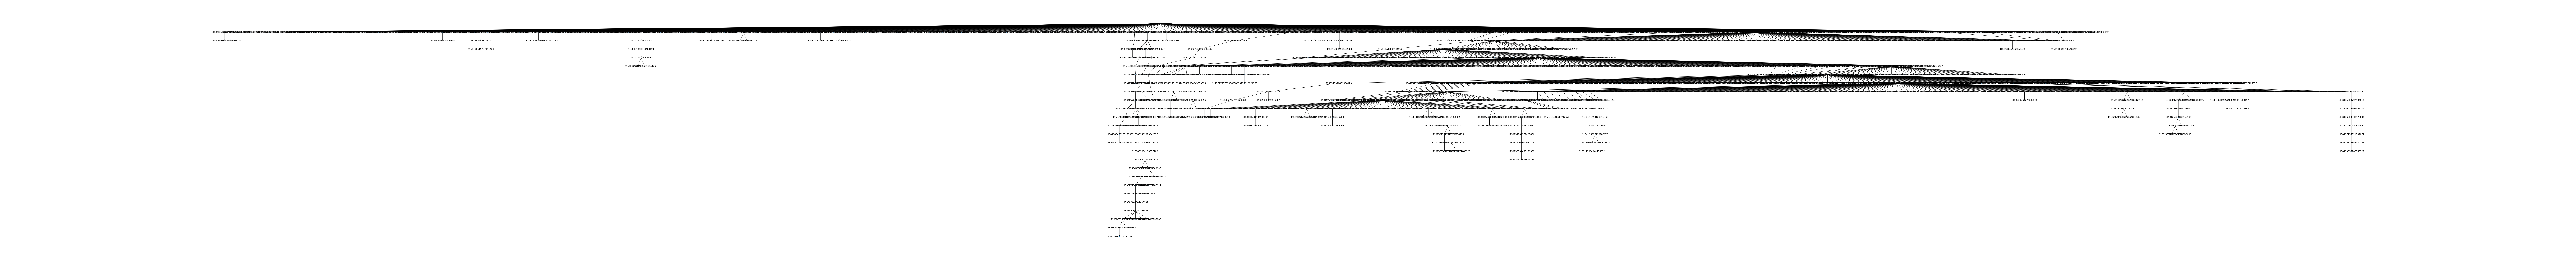

In [12]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
# same layout using matplotlib with no labels
pos =graphviz_layout(subgraph, prog='dot')
plt.figure(figsize=(200, 20), dpi=80)
nx.draw(subgraph, pos, node_size=1, with_labels=True)


In [119]:
nx.write_gml(subgraph, 'network.gml')